In [256]:
import numpy as np
import time
import networkx as nkx
import matplotlib.pyplot as plt
import string

from tqdm.notebook import tqdm as tq
import umap

In [257]:
n0,n1 = 50,50
G = nkx.generators.community.random_partition_graph([n0]*n1,n0/(n0*n1),n0/(n0*n1),seed=5)
nx = len(G.nodes)
X = np.array(np.arange(nx))
len([g for g in nkx.connected_components(G)])

1

In [258]:
nx#,[len(g) for g in nkx.connected_components(G)]

2500

In [259]:
if False:
    large_component = [g for g in nkx.connected_components(G)][0]
    component_node_exemplars = [list(g)[0] for g in nkx.connected_components(G)][1:]
    component_node_exemplars_block = [G.nodes[c]['block'] for c in component_node_exemplars]

    large_component_exemplars_by_block= [[c for c in large_component if G.nodes[c]['block']==block][0]
                                         for block in range(50)]

    large_component_exemplars2_by_block= [[c for c in large_component if G.nodes[c]['block']==block][1]
                                         for block in range(50)]

    large_component_exemplars3_by_block= [[c for c in large_component if G.nodes[c]['block']==block][2]
                                         for block in range(50)]

    for c,b in zip(component_node_exemplars,
                   component_node_exemplars_block):
        edge = (c,large_component_exemplars_by_block[b])
        G.add_edge(*edge)
        edge = (c,large_component_exemplars2_by_block[b])
        G.add_edge(*edge)
        edge = (c,large_component_exemplars3_by_block[b])
        G.add_edge(*edge)
        


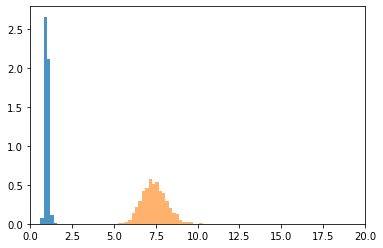

In [260]:
fig,ax = plt.subplots()

ax.hist(np.random.lognormal(mean=0,sigma=0.1,size=1000),bins=np.linspace(0,20,100),alpha=0.8,density=1)
ax.hist(np.random.lognormal(mean=2,sigma=0.1,size=1000),bins=np.linspace(0,20,100),alpha=0.6,density=1)
ax.set_xlim(0,20)

plt.show()

In [261]:
for edge in tq(G.edges):
    #print(G.edges[edge])
    if (G.nodes[edge[0]]['block']!=G.nodes[edge[1]]['block']):
        G.edges[edge]['w']=2#np.random.lognormal(mean=2,sigma=0.1)
    else:
        G.edges[edge]['w']=0.1#np.random.lognormal(mean=0,sigma=0.1)
for node in tq(G.nodes):
    del G.nodes[node]['block']
#del G.graph["partition"]    

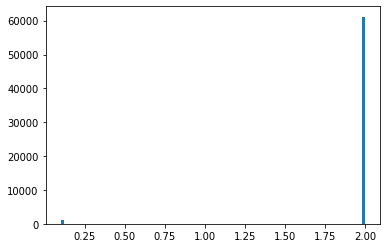

In [262]:
fig,ax = plt.subplots()
ax.hist([value['w'] for value in G.edges.values()],bins=100)
plt.show()

In [263]:
import ctd_utils

In [264]:
np.random.seed(558568+217)
flag = ctd_utils.generate_flag()
R = np.random.choice(np.arange(1e6),replace=False,size = n0*n1).astype(int)

flag

flag_{outlandish_cerulean_silverfish}

In [265]:
def pad_part(flag_part,k):
    pad = k-len(flag_part)
    if pad%2==0:
        pad = pad//2,pad//2
    else:
        pad = pad//2,pad//2+1
    pad

    return np.array(list( ('*' * pad[0]
                         + flag_part 
                         + '*' * pad[1]
                          )
                        )
                   )

In [266]:
adj = pad_part(flag.adj,n0)
rs_adj = R[np.array([i for i in G.graph['partition'][5]])]

ix_adj = np.argsort(rs_adj)
xi_adj = np.array([list(ix_adj).index(i) for i in range(n0)])

rs_adj,adj[xi_adj]

col = pad_part(flag.col,n0)
rs_col = R[np.array([i for i in G.graph['partition'][13]])]

ix_col = np.argsort(rs_col)
xi_col = np.array([list(ix_col).index(i) for i in range(n0)])

col[xi_col]

ani = pad_part(flag.ani,n0)
rs_ani = R[np.array([i for i in G.graph['partition'][25]])]

ix_ani = np.argsort(rs_ani)
xi_ani = np.array([list(ix_ani).index(i) for i in range(n0)])

ani[xi_ani]

del G.graph['partition']
H = nkx.relabel_nodes(G, {i:r for i,r in enumerate(R)} )

mapped = {r: (r,np.random.choice(list(string.ascii_lowercase+'*'))) for r in R}
for flag_part in [(rs_adj,adj[xi_adj]),
                 (rs_col,col[xi_col]),
                 (rs_ani,ani[xi_ani])]:
    for r,char in zip(*flag_part):
        mapped[r] = (r,char)
        
H = nkx.relabel_nodes(H, mapped )

In [267]:
K = nkx.Graph()

In [268]:
nodes = [node for node in H.nodes]
edges = [(*item[0],item[1]) for item in H.edges.items()]
np.random.shuffle(nodes)
np.random.shuffle(edges)

In [269]:
K.add_nodes_from(nodes)
K.add_edges_from(edges)

In [270]:
edges[0]

((290886, 'o'), (443830, 'u'), {'w': 2})

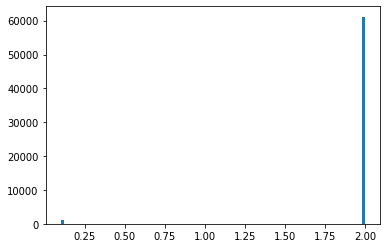

In [271]:
fig,ax = plt.subplots()
ax.hist([value['w'] for value in K.edges.values()],bins=100)
plt.show()

In [272]:
from networkx.algorithms import community

In [ ]:
test = community.greedy_modularity_communities(K,weight='w')
comms = [t for t in test]
np.empty(shape=len(K))
for c in comms:
    nums = np.array(([i[0] for i in list(c)]))
    chars = np.array(([i[1] for i in list(c)]))
    if np.sum(chars[np.argsort(nums)]=='*')>1:
        print(''.join(chars[np.argsort(nums)]))

In [250]:
P = nkx.Graph()

for edge,weight in K.edges.items():
    if weight['w']<4:
        P.add_nodes_from(edge)
        P.add_edge(*edge)

In [251]:
[len(p) for p in nkx.connected_components(P)]

[2,
 13,
 3,
 2,
 2,
 2,
 4,
 2,
 9,
 8,
 19,
 4,
 4,
 6,
 7,
 14,
 7,
 6,
 2,
 3,
 3,
 4,
 6,
 15,
 10,
 2,
 4,
 5,
 2,
 6,
 2,
 3,
 10,
 6,
 9,
 3,
 2,
 3,
 18,
 9,
 3,
 2,
 12,
 2,
 2,
 3,
 2,
 12,
 15,
 16,
 3,
 9,
 3,
 6,
 2,
 14,
 6,
 6,
 3,
 3,
 6,
 8,
 9,
 7,
 32,
 4,
 2,
 7,
 2,
 3,
 2,
 3,
 6,
 3,
 4,
 16,
 2,
 22,
 4,
 17,
 2,
 2,
 2,
 2,
 2,
 2,
 14,
 7,
 2,
 2,
 8,
 11,
 2,
 19,
 4,
 2,
 3,
 6,
 2,
 5,
 2,
 2,
 2,
 2,
 3,
 2,
 4,
 3,
 2,
 7,
 2,
 13,
 2,
 5,
 13,
 6,
 3,
 5,
 15,
 10,
 4,
 5,
 4,
 2,
 3,
 3,
 7,
 2,
 2,
 3,
 6,
 2,
 2,
 4,
 5,
 9,
 2,
 2,
 26,
 3,
 6,
 3,
 3,
 4,
 10,
 3,
 2,
 2,
 19,
 2,
 6,
 3,
 5,
 2,
 5,
 2,
 4,
 4,
 2,
 2,
 2,
 3,
 3,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 6,
 5,
 3,
 2,
 4,
 13,
 3,
 7,
 12,
 3,
 3,
 8,
 5,
 4,
 3,
 2,
 2,
 10,
 3,
 4,
 3,
 2,
 2,
 2,
 6,
 2,
 12,
 2,
 3,
 2,
 2,
 3,
 4,
 2,
 3,
 4,
 2,
 2,
 2,
 8,
 3,
 2,
 7,
 2,
 2,
 6,
 3,
 3,
 3,
 2,
 3,
 2,
 3,
 6,
 2,
 6,
 2,
 2,
 2,
 2,
 8,
 2,
 3,
 5,
 3,
 2,
 5,
 3,
 2,
 2,
 4,
 6,
 2

In [253]:
test = nkx.connected_components(P)
comms = [t for t in test]
np.empty(shape=len(K))
for c in comms:
    nums = np.array(([i[0] for i in list(c)]))
    chars = np.array(([i[1] for i in list(c)]))
    if np.sum(chars[np.argsort(nums)]=='*')>2:
        print(''.join(chars[np.argsort(nums)]))

**sef***
*****
**************ceuea*************
***u****
*lis**
****lh****
****
*iv***
****
